In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [25]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [27]:
print(df['Workout_Type'].unique())

['Yoga' 'HIIT' 'Cardio' 'Strength']


In [28]:
# Use OneHotEncoder to encode Workout_Type

encoder = OneHotEncoder(sparse_output=False)
workout_type_encoded = encoder.fit_transform(df[['Workout_Type']])
workout_type_columns = encoder.get_feature_names_out(['Workout_Type'])

workout_type_df = pd.DataFrame(workout_type_encoded, columns=workout_type_columns, index=df.index)

df_encoded = pd.concat([df, workout_type_df], axis=1)
df_encoded = df_encoded.drop('Workout_Type', axis=1)

df_encoded

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0.0,0.0,1.0,0.0
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0.0,0.0,1.0,0.0
970,59,0,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1.0,0.0,0.0,0.0
971,32,1,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0.0,1.0,0.0,0.0


In [29]:
df_encoded.drop(['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'], axis=1, inplace=True)

In [30]:
# Split the data into training and testing samples
X = df_encoded.drop('Calories_Burned', axis=1)
y = df_encoded['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Age, Gender, Weight, Height, Max_BPM, Avg_BPM, Resting_BPM, Session_Duration, Workout_Type, Fat_Percentage
# Scaling features
scaler = StandardScaler()
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                      'Session_Duration (hours)', 'Fat_Percentage']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

Training set shape: (778, 13)
Testing set shape: (195, 13)


In [31]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict calories burned
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = ((y_test - y_pred) ** 2).mean()
print(f"Mean squared error: {mse}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}") # 98% of variance can be explained

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}") # Prone to outliers

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Mean squared error: 1638.2579284130334
R-squared Score: 0.9803625121379957
RMSE: 40.47539905193071
MAE: 30.15650575291493


In [43]:
# Calculate p-value
def calculate_p_value(r_squared, num_predictors, sample_size):
    # Calculate the F-statistic
    f_statistic = (r_squared / num_predictors) / ((1 - r_squared) / (sample_size - num_predictors - 1))
    
    # Calculate degrees of freedom
    df1 = num_predictors
    df2 = sample_size - num_predictors - 1
    
    # Calculate the p-value
    p_value = 1 - stats.f.cdf(f_statistic, df1, df2)
    
    return f_statistic, p_value

num_predictors = X_train.shape[1]  # Number of features
size = X_train.shape[0] + X_test.shape[0]  # Total number of samples

f_stat, p_val = calculate_p_value(r2, num_predictors, size)
print(f"F-statistic: {f_stat:.4f} p_val: {p_val:.6f}")

F-statistic: 3682.7821 p_val: 0.000000


In [34]:
# Inspect for outliers
description = df_encoded.describe()
print(description)

              Age      Gender  Weight (kg)  Height (m)     Max_BPM  \
count  973.000000  973.000000   973.000000   973.00000  973.000000   
mean    38.683453    0.525180    73.854676     1.72258  179.883864   
std     12.180928    0.499622    21.207500     0.12772   11.525686   
min     18.000000    0.000000    40.000000     1.50000  160.000000   
25%     28.000000    0.000000    58.100000     1.62000  170.000000   
50%     40.000000    1.000000    70.000000     1.71000  180.000000   
75%     49.000000    1.000000    86.000000     1.80000  190.000000   
max     59.000000    1.000000   129.900000     2.00000  199.000000   

          Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  973.000000   973.000000                973.000000       973.000000   
mean   143.766701    62.223022                  1.256423       905.422405   
std     14.345101     7.327060                  0.343033       272.641516   
min    120.000000    50.000000                  0.500000     

In [35]:
# Create outlier function
def find_outliers(data):
    # Convert the data to a numpy array for easier calculations
    data = np.array(data)
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Calculate the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [36]:
find_outliers(df_encoded['Weight (kg)']) # MSE went up after removing the outliers

(array([129. , 129.5, 128.2, 128.4, 128.4, 129.9, 128.4, 127.9, 129.2]),
 np.float64(16.250000000000007),
 np.float64(127.85))

In [37]:
# Cross Validation 

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores) # Second fold of validation is the most optimal

[-1634.64422631 -1297.59691908 -1624.83223331 -1588.78756398
 -1855.50211213]


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       973 non-null    int64  
 1   Gender                    973 non-null    int64  
 2   Weight (kg)               973 non-null    float64
 3   Height (m)                973 non-null    float64
 4   Max_BPM                   973 non-null    int64  
 5   Avg_BPM                   973 non-null    int64  
 6   Resting_BPM               973 non-null    int64  
 7   Session_Duration (hours)  973 non-null    float64
 8   Fat_Percentage            973 non-null    float64
 9   Workout_Type_Cardio       973 non-null    float64
 10  Workout_Type_HIIT         973 non-null    float64
 11  Workout_Type_Strength     973 non-null    float64
 12  Workout_Type_Yoga         973 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 98.9 KB


In [39]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Age: -40.07892959540634
Gender: 81.95546387134033
Weight (kg): 1.6515078407590806
Height (m): 1.4513623820732704
Max_BPM: 1.127356664297512
Avg_BPM: 88.61407120949119
Resting_BPM: 4.355099033241451
Session_Duration (hours): 240.11528119904057
Fat_Percentage: -3.4178646634981042
Workout_Type_Cardio: 3.995549772867733
Workout_Type_HIIT: -0.6276603978827433
Workout_Type_Strength: 1.1131409079782717
Workout_Type_Yoga: -4.481030282963321


In [40]:
# Compare with other models

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

models = [('Linear Regression', model), ('Ridge', ridge), ('Lasso', lasso)]

for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} R2 Score: {score}")

Linear Regression R2 Score: 0.9803625121379957
Ridge R2 Score: 0.9803041266050411
Lasso R2 Score: 0.9802439042498201


In [41]:
# Save the model & scaler

with open('linear_regressor.pkl', 'wb') as model_file:
    pk.dump(model, model_file)
    
with open('scaler.pkl', 'wb') as file:
    pk.dump(scaler, file)

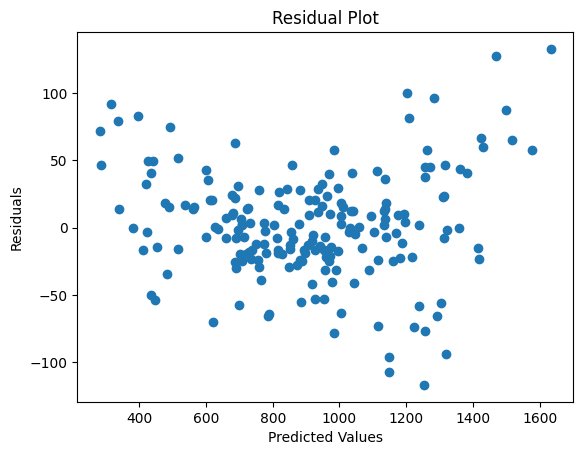

In [42]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()